#**DEEP LEARNING Modeling**

###**Bidirectional LSTM**

In [ ]:
# Importing necessary libraries

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

from tensorflow import keras
from tensorflow.keras.metrics import AUC
import tensorflow_datasets as tfds

from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Bidirectional, LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Bidirectional, LSTM

<ipython-input-2-3bd4a1787643>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/My Drive/Design Project"

/content/drive/My Drive/Design Project


In [ ]:
train_data = pd.read_csv('preprocessed_train_data.csv')
test_data = pd.read_csv('preprocessed_test_data.csv')
valid_data = pd.read_csv('preprocessed_valid_data.csv')

In [ ]:
# Selecting the features and target variables
X = train_data["text_preprocessed"]
y = train_data["propaganda_label"]

In [ ]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [ ]:
# Adding parameter values
num_words = 5000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

In [ ]:
# Tokenize our training data
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

# Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(X_train)

# Get max training sequence length
# maxlen = max([len(x) for x in train_sequences])
maxlen = 1000

# Pad the training sequences
train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

# Output the results of our work
print("Word index:\n", {key: word_index[key] for key in list(word_index)[:3]})
print("\nTraining sequences:\n", train_sequences[:3])
print("\nPadded training sequences:\n", train_padded[:3])
print("\nPadded training shape:", train_padded.shape)
print("Training sequences data type:", type(train_sequences))
print("Padded Training sequences data type:", type(train_padded))

Word index:
 {'<UNK>': 1, 'said': 2, 'year': 3}

Training sequences:
 [[56, 4421, 270, 84, 25, 1696, 815, 1, 1331, 4694, 1, 304, 2818, 1, 523, 509, 1, 1, 1, 2286, 23, 71, 383, 842, 1288, 97, 902, 2867, 378, 108, 67, 523, 2286, 214, 718, 50, 1, 611, 241, 10, 1, 29, 2, 2286, 45, 718, 303, 582, 15, 353, 230, 1, 1, 1, 25, 2, 71, 1148, 378, 97, 207, 464, 1, 1389, 152, 1084, 3254, 352, 1, 3235, 2451, 1, 1285, 583, 523, 319, 1, 25, 601, 1, 1, 1, 26, 471, 810, 25, 2031, 1, 608, 16, 738, 495, 97, 214, 523, 504, 523, 16, 72, 1, 1, 1157, 236, 1, 1, 2, 16, 738, 3490, 16, 482, 150, 527, 25, 2, 264, 2698, 363, 1942, 329, 1106, 1724, 3984, 329, 492, 363, 1106, 1586, 1378, 2045, 323, 1942, 93, 324, 2146, 2298, 1, 269, 371, 823, 1106, 632, 172, 632, 1378, 329, 492, 253, 223, 1615, 416, 2428, 2278, 464, 6, 2530, 34, 1, 1, 1, 1, 1, 1, 318, 4, 6, 99, 409, 516, 1633, 2663, 685, 464, 6, 1, 2286, 464, 6, 568, 1059, 97, 543, 1148, 1, 36, 141, 251, 1, 1113, 1112, 2987, 2206, 370, 207, 56, 538, 25, 38, 2217, 72

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

print("Testing sequences:\n", test_sequences[:3])
print("\nPadded testing sequences:\n", test_padded[:3])
print("\nPadded testing shape:",test_padded.shape)

Testing sequences:
 [[547, 3934, 211, 2906, 240, 305, 2442, 1, 3744, 4273, 567, 110, 39, 1771, 547, 3934, 6, 848, 601, 3470, 1, 18, 2716, 331, 1, 2325, 432, 331, 676, 158, 704, 4200, 3250, 851, 2555, 388, 200, 47, 2170, 230, 599, 209, 214, 119, 114, 217, 331, 98, 800, 1164, 1, 3419, 773, 14, 1, 18, 331, 148, 1455, 56, 39, 1, 18, 848, 1, 211, 2688, 659, 941, 1], [113, 281, 42, 1, 297, 1, 1, 123, 177, 2463, 443, 29, 432, 737, 872, 168, 4, 14, 4318, 1049, 1638, 768, 102, 256, 2463, 1972, 434, 281, 443, 624, 4145, 1124, 207, 102, 109, 2463, 2707, 1380, 304, 604, 2333, 64, 6, 1, 554, 1638, 768, 2463, 1972, 66, 11, 169, 5, 281, 1, 1, 1, 1, 58, 2972, 1194, 168, 124, 1, 9, 3869, 1, 1, 238, 2463, 1, 147, 1, 434, 281, 443, 624, 432, 225, 974, 296, 556, 1, 2162, 109, 544, 246, 1967, 42, 1, 297, 1, 3028, 115, 1, 281, 1773, 2463, 4843, 31, 1, 123, 225, 1, 13, 3, 54, 2085, 1434, 238, 336, 29, 177, 2463, 443, 69, 1, 562, 1, 2768, 1, 1, 2463, 1147, 1, 1, 1, 109, 3858, 2463, 711, 764, 562, 2043, 2962, 

In [ ]:
train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [ ]:
train_labels

array([-1,  1, -1, ..., -1, -1, -1])

In [ ]:
test_labels

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
# Recode class labels from 1 and -1 to 0 and 1

train_labels[train_labels == -1] = 0
test_labels[test_labels == -1] = 0

In [ ]:
train_labels

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
test_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Get class weights from training data
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes =np.unique(train_labels), y= train_labels)

# Create a dictionary to map class index to weight
class_weights_dict = dict(enumerate(class_weights))

print(class_weights_dict)

{0: 0.5629032888819365, 1: 4.4743549891202985}


**Bidirectional LSTM without regularization**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Embedding(10000, 32),
    Conv1D(32, 7, activation='relu'),
    MaxPooling1D(5),
    # Bidirectional(LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=keras.regularizers.l2(0.001))),
    Bidirectional(LSTM(32, return_sequences=True)),

    # Bidirectional(LSTM(32, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=keras.regularizers.l2(0.001))),
    Bidirectional(LSTM(32)),

    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy",AUC()])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
checkpoint1 = keras.callbacks.ModelCheckpoint("LSTM_model.h5", save_best_only=True)

history = model.fit(train_padded, train_labels, epochs=5, validation_data=(test_padded, test_labels), callbacks=[early_stop, checkpoint1])

Epoch 1/5
900/900 [==============================] - ETA: 0s - loss: 0.1997 - accuracy: 0.9304 - auc_1: 0.9072

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


900/900 [==============================] - 400s 436ms/step - loss: 0.1997 - accuracy: 0.9304 - auc_1: 0.9072 - val_loss: 0.2542 - val_accuracy: 0.9033 - val_auc_1: 0.9528
Epoch 2/5
900/900 [==============================] - 344s 381ms/step - loss: 0.1258 - accuracy: 0.9573 - auc_1: 0.9592 - val_loss: 0.1518 - val_accuracy: 0.9485 - val_auc_1: 0.9517
Epoch 3/5
900/900 [==============================] - 331s 367ms/step - loss: 0.1063 - accuracy: 0.9639 - auc_1: 0.9722 - val_loss: 0.1767 - val_accuracy: 0.9454 - val_auc_1: 0.9445
Epoch 4/5
900/900 [==============================] - 334s 371ms/step - loss: 0.0919 - accuracy: 0.9684 - auc_1: 0.9803 - val_loss: 0.1408 - val_accuracy: 0.9519 - val_auc_1: 0.9602
Epoch 5/5
900/900 [==============================] - 331s 367ms/step - loss: 0.0750 - accuracy: 0.9747 - auc_1: 0.9854 - val_loss: 0.1501 - val_accuracy: 0.9542 - val_auc_1: 0.9527


In [ ]:
# Load the saved model
model = load_model("LSTM_model.h5")

In [ ]:
model

225/225 [==============================] - 19s 75ms/step
Confusion Matrix:
[[6287  107]
 [ 239  565]]


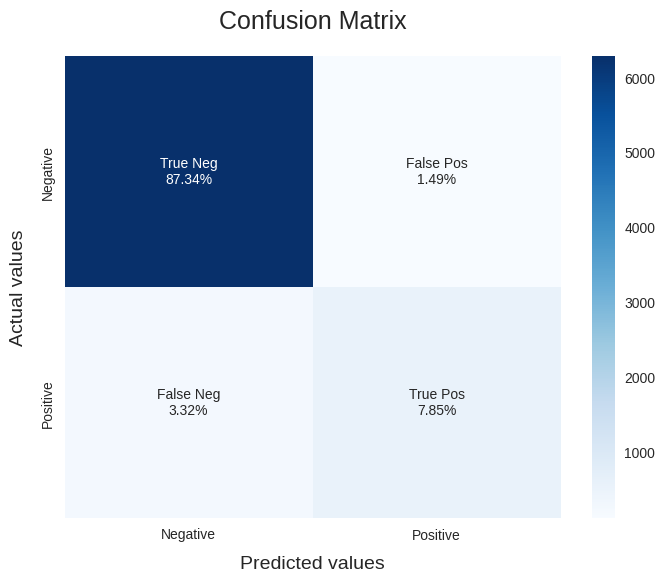

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.98      0.97      6394
           1       0.84      0.70      0.77       804

    accuracy                           0.95      7198
   macro avg       0.90      0.84      0.87      7198
weighted avg       0.95      0.95      0.95      7198

ROC AUC Score: 0.9642342906985248


<ipython-input-22-ee00af9609cd>:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


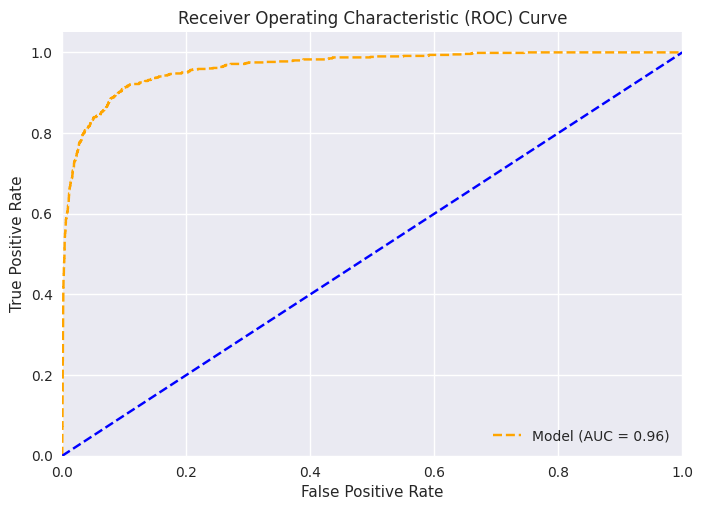

In [ ]:
# Make predictions on the training data using the model

predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

161/161 [==============================] - 12s 71ms/step
Confusion Matrix:
[[4459   91]
 [ 127  448]]


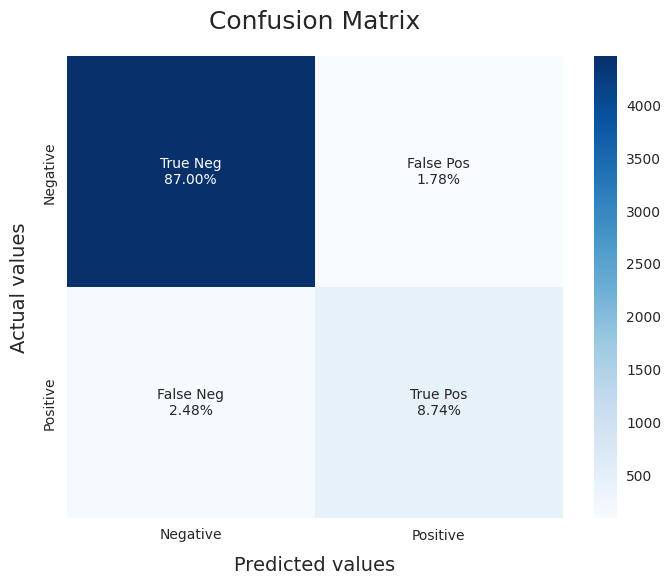

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.98      0.98      4550
           1       0.83      0.78      0.80       575

    accuracy                           0.96      5125
   macro avg       0.90      0.88      0.89      5125
weighted avg       0.96      0.96      0.96      5125

ROC AUC Score: 0.9761444816053512


<ipython-input-23-49ab7639fdb0>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


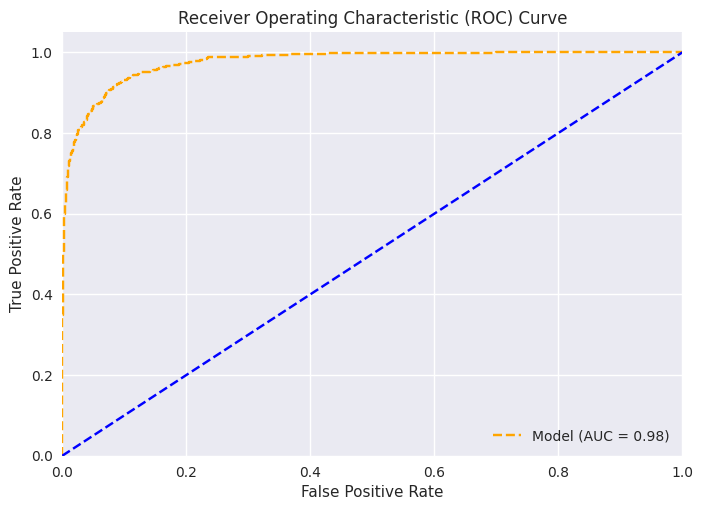

In [ ]:
# Make predictions on the Validation data using the model

test_sequences = tokenizer.texts_to_sequences(valid_data.text_preprocessed)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Changing the label name
y_test = valid_data.propaganda_label
test_labels = np.array(y_test)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

318/318 [==============================] - 24s 74ms/step
Confusion Matrix:
[[8825  194]
 [ 274  866]]


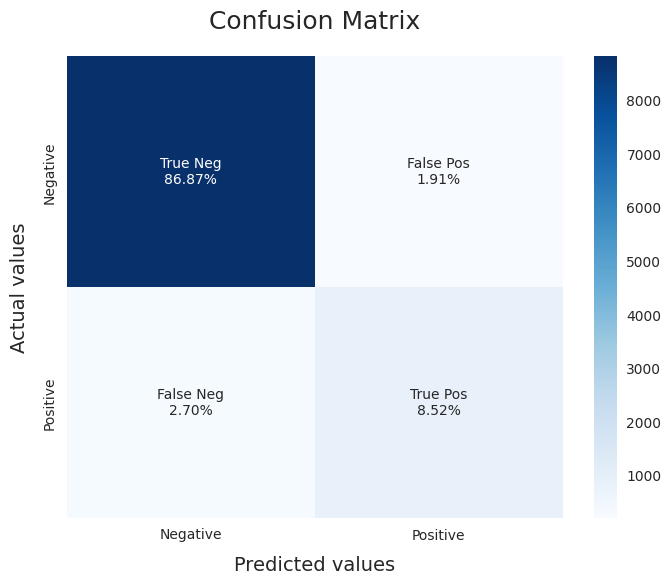

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.98      0.97      9019
           1       0.82      0.76      0.79      1140

    accuracy                           0.95     10159
   macro avg       0.89      0.87      0.88     10159
weighted avg       0.95      0.95      0.95     10159

ROC AUC Score: 0.9675402610084364


<ipython-input-24-c99215d7e8f2>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


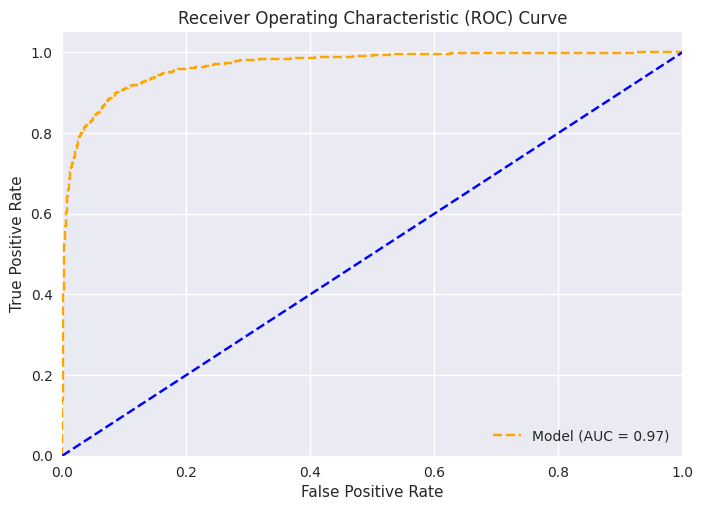

In [ ]:
# Make predictions on the Test data using the model

test_sequences = tokenizer.texts_to_sequences(test_data.text_preprocessed)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Changing the label name
y_test = test_data.propaganda_label
test_labels = np.array(y_test)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Bidirectional LSTM with regularization**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Embedding(10000, 32),
    Conv1D(32, 7, activation='relu'),
    MaxPooling1D(5),
    # Bidirectional(LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=keras.regularizers.l2(0.001))),
    Bidirectional(LSTM(32, return_sequences=True)),

    Bidirectional(LSTM(32, kernel_regularizer=keras.regularizers.l2(0.001))),


    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy",AUC()])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
checkpoint = keras.callbacks.ModelCheckpoint("LSTM_model2.h5", save_best_only=True)

history = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels), callbacks=[early_stop, checkpoint])

Epoch 1/10
900/900 [==============================] - 361s 392ms/step - loss: 0.2243 - accuracy: 0.9312 - auc_2: 0.9089 - val_loss: -4.0054 - val_accuracy: 0.0753 - val_auc_2: 0.0000e+00
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


900/900 [==============================] - 347s 385ms/step - loss: 0.1283 - accuracy: 0.9579 - auc_2: 0.9608 - val_loss: -2.8982 - val_accuracy: 0.0747 - val_auc_2: 0.0000e+00
Epoch 3/10
900/900 [==============================] - 346s 384ms/step - loss: 0.1105 - accuracy: 0.9624 - auc_2: 0.9727 - val_loss: -3.9234 - val_accuracy: 0.0844 - val_auc_2: 0.0000e+00
Epoch 4/10
900/900 [==============================] - 346s 385ms/step - loss: 0.0910 - accuracy: 0.9688 - auc_2: 0.9801 - val_loss: -3.7554 - val_accuracy: 0.0954 - val_auc_2: 0.0000e+00


In [ ]:
# Load the saved model
model = load_model("LSTM_model2.h5")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 conv1d_2 (Conv1D)           (None, None, 32)          7200      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, None, 32)          0         
 g1D)                                                            
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                      

318/318 [==============================] - 25s 72ms/step
Confusion Matrix:
[[8894  125]
 [ 375  765]]


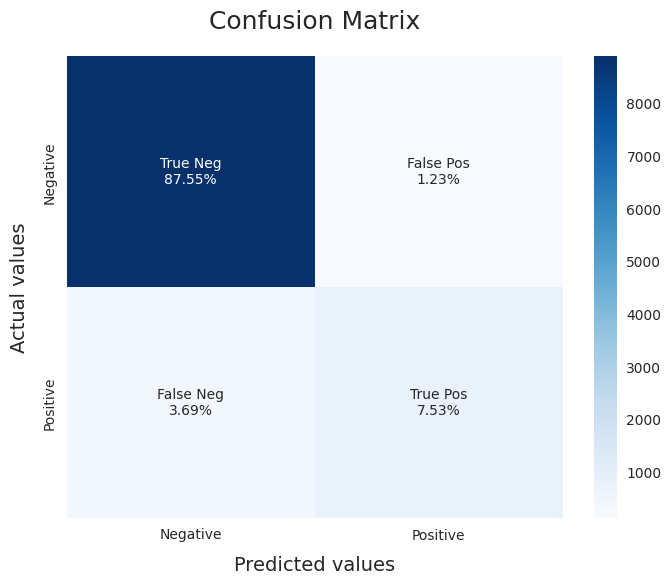

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.99      0.97      9019
           1       0.86      0.67      0.75      1140

    accuracy                           0.95     10159
   macro avg       0.91      0.83      0.86     10159
weighted avg       0.95      0.95      0.95     10159

ROC AUC Score: 0.9506380292676475


<ipython-input-28-ee00af9609cd>:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


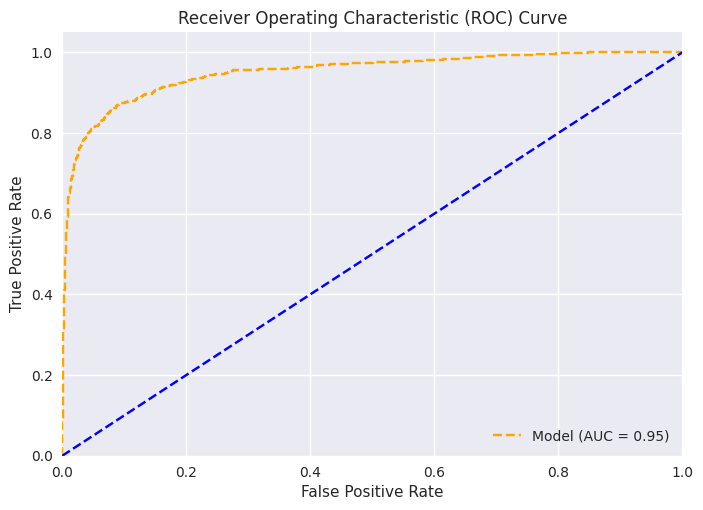

In [ ]:
# Make predictions on the training data using the model

predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

161/161 [==============================] - 12s 75ms/step
Confusion Matrix:
[[4485   65]
 [ 169  406]]


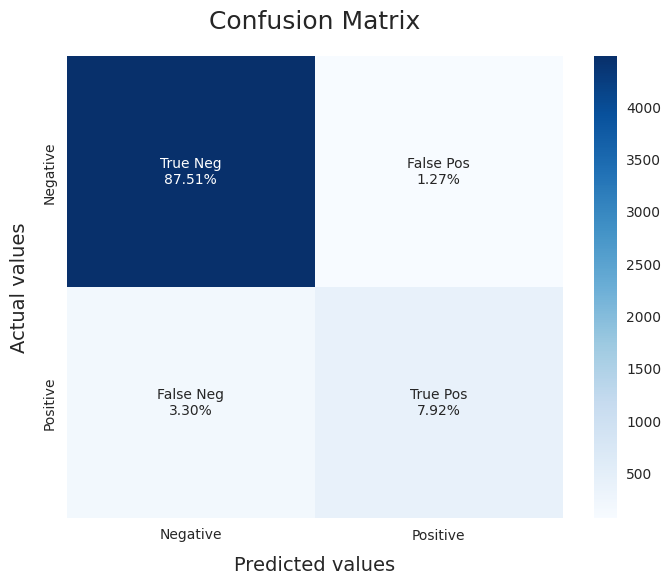

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.99      0.97      4550
           1       0.86      0.71      0.78       575

    accuracy                           0.95      5125
   macro avg       0.91      0.85      0.88      5125
weighted avg       0.95      0.95      0.95      5125

ROC AUC Score: 0.9601173435260392


<ipython-input-29-49ab7639fdb0>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


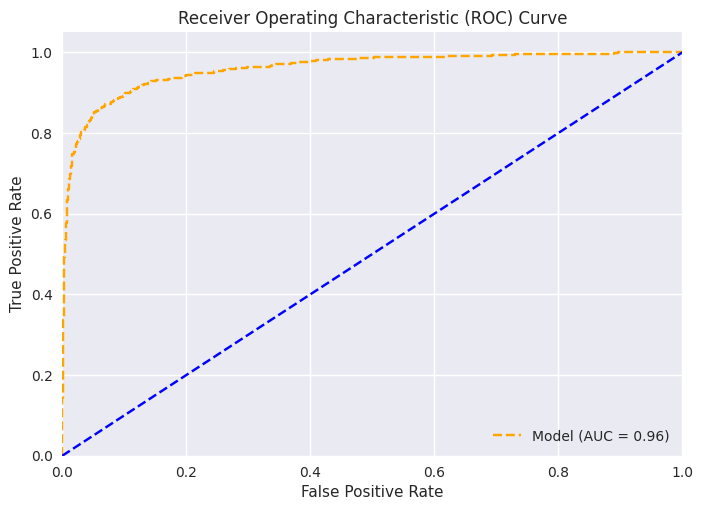

In [ ]:
# Make predictions on the Validation data using the model

test_sequences = tokenizer.texts_to_sequences(valid_data.text_preprocessed)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Changing the label name
y_test = valid_data.propaganda_label
test_labels = np.array(y_test)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

318/318 [==============================] - 24s 77ms/step
Confusion Matrix:
[[8894  125]
 [ 375  765]]


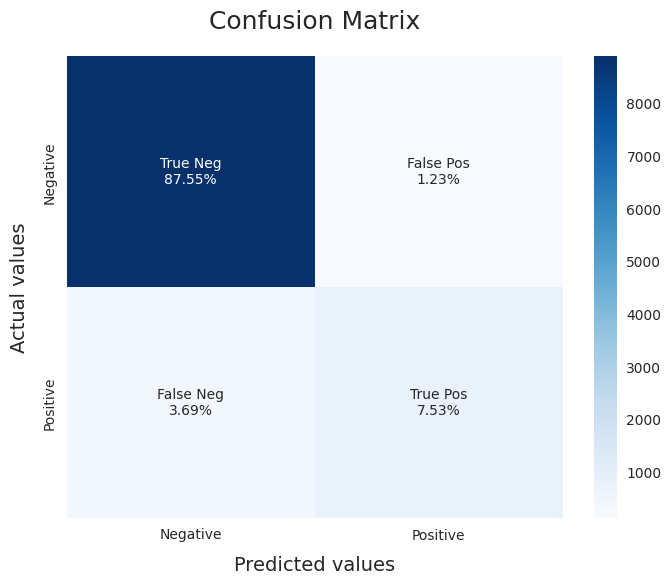

Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.99      0.97      9019
           1       0.86      0.67      0.75      1140

    accuracy                           0.95     10159
   macro avg       0.91      0.83      0.86     10159
weighted avg       0.95      0.95      0.95     10159

ROC AUC Score: 0.9506380292676475


<ipython-input-30-c99215d7e8f2>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--' , color='blue')


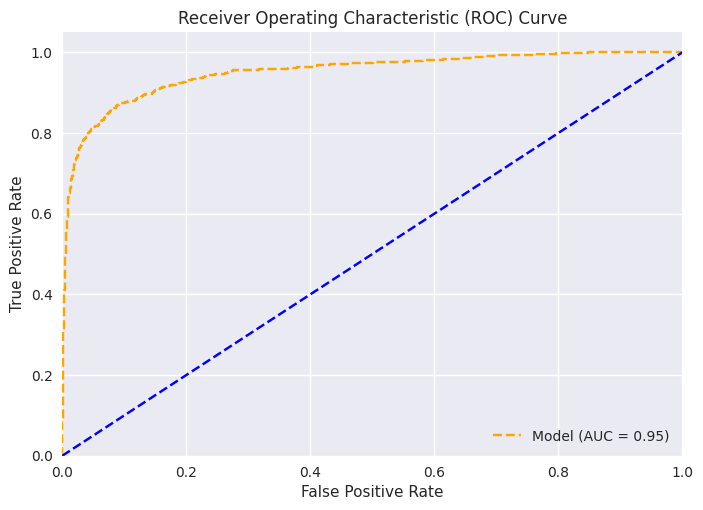

In [ ]:
# Make predictions on the Test data using the model

test_sequences = tokenizer.texts_to_sequences(test_data.text_preprocessed)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

predictions = model.predict(test_padded)
predicted_labels = np.round(predictions)

# Changing the label name
y_test = test_data.propaganda_label
test_labels = np.array(y_test)

# Recode class labels from 1 and 0 to -1 and 1
test_labels[test_labels == 0] = -1
predicted_labels[predicted_labels == 0] = -1

# Generate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# Computing and plotting the Confusion matrix
cf_matrix = confusion_matrix(test_labels, predicted_labels)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

plt.figure(figsize=(8, 6)) # Create a new figure for confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Generate the classification report
class_report = classification_report(test_labels, predicted_labels)
print("Classification Report:\n", class_report)

# Calculate and print the ROC AUC score
auc_score = roc_auc_score(test_labels, predictions)
print("ROC AUC Score:", auc_score)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)
sns.set_style("darkgrid")
plt.figure()
plt.plot(fpr, tpr, linestyle='--',color='orange',label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--' , color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()